---
title: Hinge experiment
permalink: /posts/2018/06/hinge-experiment
date: 2018-06-03
tags:
    - data-science
    - coding
---

A couple of months ago, I was having dinner with a friend who was trying to convince me to start online dating - he's a hopeless romantic, and perhaps the only person on this earth who genuinely enjoys it. Now, I really dislike online dating for many reasons and we'd had this conversation many times before, so I wasn't interested in his arguments. But as he was telling me about the new [app](https://hinge.co/) he was using, an idea started to form... Because of the way the app is set up, I realized I could test one of my longtime hypotheses, and in the process get some much-needed validation for why online dating sucks and definitively win our debate about whether or not I should sign up.

Unlike normal online dating apps, the new app he was telling me about, [Hinge](https://hinge.co), doesn't let you "like" an entire profile - rather, you choose one photo or info snippet to like on the entire profile. You can also leave a comment on the thing you like, which is actually a great way to start conversations. I was intrigued by the idea of the app, but even more so by the data science opportunity this presented!

See, one of the main reasons that I dislike online dating is that I think it's too difficult to align what I like about myself with what the people I like actually like about me, and even more so difficult to ensure that the profile content reflects those things. Furthermore, I'm fairly convinced that the majority of men on the internet are not looking for someone like me - they want a pretty generic woman who fits standard ideals of beauty, intelligence, humor, behavior, etc. In other words, I'm bad at online dating and I want some validation for why that is. :P

As my friend was telling me about all the wonderful people he'd gone on dates with, I told him instead to focus on the thing I was getting super excited about: running an experiment to test this second hypothesis. We wrapped up our dinner and headed home to make my profile. We set it up so half of my photos were super generic millenial woman - very #basic - and so the other half were very "me" - reflective of the parts of my personality I _want_ people to be attracted to.

We decided that I would track which photo or blurb on my profile each person liked, the "basic" rating of the content they liked, and whether or not I liked them back. Later, I also added a sort of "ranking" for how much I liked each potential suitor (mostly because I ended barely ever liking anyone back, so needed to get some data with a bit more variance!) To keep my own sanity, I didn't track the "basic" level of the people _I_ was liking, though that would have been fun to compare. I do wonder if my "match percent" is higher (or lower!) among people who liked me first than among the general population. But alas, a woman can only collect so much data...

In [83]:
import pandas as pd
import scipy.stats as sp

from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('Hinge - Claire.csv')
df = df.dropna(how='all', axis=1)
df['date'] = pd.to_datetime(df['Date entered'] + '/18')
df = df.rename(columns={'how basic? (1 = basic white girl, 4 = claire as af)': 'basicness'})
df.tail()

,Date entered,Person,which type?,description,basicness,Comment left?,Did I match him?,"Did I like him (1=no, 4=yes)",Unnamed: 8,Unnamed: 10,date
142,5/7,Pratap,photo,cuba-smiling-first-photo,3,NaN,n,2.0,"physical, short-profile",NaN,2018-05-07
143,5/7,Yashar,photo,bali-bird-claire-face,4,NaN,n,2.0,"physical, old(35)",NaN,2018-05-07
144,5/7,Cenk,photo,drunk-claire-and-jaz,1,NaN,n,2.0,"physical, mit-grad-student",NaN,2018-05-07
145,5/7,Ezra,photo,cuba-smiling-first-photo,3,NaN,n,2.0,"physical, young(23)",NaN,2018-05-07
146,5/7,Pablo,photo,bali-bird-claire-face,4,NaN,n,2.0,NaN,NaN,2018-05-07


First, let's take a look at our data. How many people liked me, and did they like photos or comments? 

### Total suitors

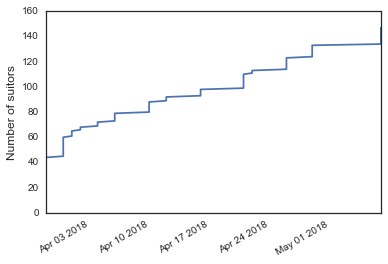

In [28]:
sns.set_style('white')

# Get total number of suitors
df['n'] = 1
df['n_cumsum'] = df['n'].cumsum()
df.plot(x='date', y='n_cumsum', legend=False)
plt.ylabel('Number of suitors', fontsize='large')
plt.xlabel('')

In [32]:
df.groupby('date').sum()['n'].head(3)

date
2018-03-29    44
2018-03-31    16
2018-04-01     5
Name: n, dtype: int64

In total, I had 147 people like me (we'll call these "suitors") over the course of the ~40-day experiment. The first few days of the experiment were a little overwhelming - on the first day collecting data, I entered over 40 suitors! Thankfully, the pace slowed down considerably after that. I'm not sure I would have been able to continue otherwise!

In [36]:
df.groupby('which type?').size()

which type?
comment     30
photo      117
dtype: int64

The majority of likes (~80%) were for photos, though there were also some suitors who liked one of my short answers to the prompts given by Hinge.

### Match rate

In [37]:
df.groupby('Did I match him?').size()

Did I match him?
n    137
y     10
dtype: int64

I did not like back the vast majority of my suitors - I said "yes" to 10 of the 147 suitors. That's a 6.8% rate, slightly less than the [MIT undergrad admission rate](http://mitadmissions.org/apply/process/stats)! That said, I don't think this is actually an honest reflection of how picky I am (though I am picky!) - I'm pretty sure it's actually a better reflection of my distaste for online dating...

### The experiment

Okay, enough of this data exploration - let's get to the meat of it! Does the data support my hypothesis that people on the internet just want a generic woman - can I feel completely validated in my distaste for online dating, or do I need to find a better excuse??!

I rated each part of my profile on a scale from 1 to 4, where 1 was the most generic/basic (i.e. a blurry photo of me and my friend drunk in a bar or a silhoeutte of me walking on the beach) and 4 was the most Claire (i.e. mostly photos of me making funny faces). Let's see...

In [86]:
df.groupby(['description', 'basicness']).size()

description                                   basicness
bali-bird-claire-face                         4            21
beach-body-silhouette                         1             8
cambodia-farm-girl-claire                     4             1
candy-crush                                   2             1
cuba-smiling-first-photo                      3            47
drunk-claire-and-jaz                          1            15
graduation-tongue-sticking-out                4             2
great-use-of-emojis                           1             6
                                              2             7
motorcycle-claire-laos                        3            10
open-communication-shared-puns-relationship   1             7
posed-angkor-wat-photo                        1             8
sending-postcards-award                       4             5
shelby-and-claire-ptown                       2             4
whiskey-friends-and-frisbee-simple-pleasures  1             5
dtype: int64

Oops, it looks like I labeled the same short answer with two different ratings. **TODO: figure out what the question was!**. This was the answer to the question "**XXXXX**", and "Great use of emojis" was literally the suggested response - definitely a 1.

In [87]:
df.loc[df.query('description == "great-use-of-emojis"').index, 'basicness'] = 1

In [90]:
df.drop_duplicates(['description', 'basicness'])[['description', 'basicness']].sort_values(by='basicness')

,description,basicness
1,drunk-claire-and-jaz,1
7,great-use-of-emojis,1
14,beach-body-silhouette,1
83,posed-angkor-wat-photo,1
90,open-communication-shared-puns-relationship,1
91,whiskey-friends-and-frisbee-simple-pleasures,1
0,shelby-and-claire-ptown,2
32,candy-crush,2
4,motorcycle-claire-laos,3
5,cuba-smiling-first-photo,3


So we're actually going to flub some of the analysis here, because the experiment wasn't totally cleanly set up (hey, come on this isn't my day job...) I was planning on hating this a lot less and running more experiments (or at least changing up my photos more often), but I ended up just lasting long enough to switch around my photos once. After my first profile creation night with my friend, I did one more round of edits with another friend, where we removed some of the intermediate photos and replaced them with more "extreme" examples. So the distribution of "basicness" ratings in my profile aren't exactly even, and did change a bit throughout the course of the experiment. For now, I'm going to completely ignore this caveat and proceed regardless. This isn't rocket science, it's just a dumb thing I did for fun! :P

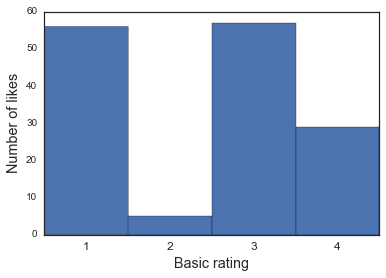

In [99]:
fig, ax = plt.subplots()
ax.hist(df['basicness'], bins=range(1, 6))
ax.set_xticks([1.5, 2.5, 3.5, 4.5])
ax.set_xticklabels([1,2,3,4], fontsize='large')
ax.set_xlabel('Basic rating', fontsize='x-large')
ax.set_ylabel('Number of likes', fontsize='x-large')

Hm, looks like this _could_ be consistent with uniform sampling from the given photos... Let's see what the probability of getting this distribution from a multinomial distribution seeded with the distribution of categories on my profile.

In [120]:
def count_basics(df):
    """
    Count the number of profile items per basic rating, proportion of items, and 
    total number of 'likes' per category.
    """
    prof_count = df.drop_duplicates(['description', 'basicness']).groupby('basicness').size()
    prof_prop = (df.drop_duplicates(['description', 'basicness']).groupby('basicness').size() 
        / df.drop_duplicates(['description', 'basicness']).shape[0])
    likes = df['basicness'].value_counts(sort=False)

    res = pd.concat([prof_count, prof_prop, likes], axis=1)
    res.columns = ['profile_count', 'profile_proportion', 'number_likes']
                    
    return res

In [121]:
count_basics(df)

,profile_count,profile_proportion,number_likes
basicness,,,
1,6,0.428571,56
2,2,0.142857,5
3,2,0.142857,57
4,4,0.285714,29


In [114]:
rv = sp.multinomial(147, [0.43, 0.14, 0.14, 0.29])
rv.pmf([56, 5, 57, 29])

4.962898960000889e-18

Hm, I'm not sure I trust this result - I think a lot of the significance may be driven by the abnormally low number of "2" ratings. But I actually removed any profile items with a basic rating of 2 after my first round of edits. What do the numbers look like if we ignore these?

In [124]:
count_basics(df.query('basicness != 2'))

,profile_count,profile_proportion,number_likes
basicness,,,
1,6,0.500000,56
3,2,0.166667,57
4,4,0.333333,29


In [125]:
rv = sp.multinomial(142, [0.5, 0.17, 0.33])
rv.pmf([56, 57, 29])

2.184134160669811e-12

Okay, let's try one more thing. Right now, I'm lumping together both of my profile iterations. I had my more recent profile for the majority of this experiment, so let's re-calculate the p-value with just using the distribution from that profile... **TODO**: remember what the distributions were, haha. Maybe also only query the things that were in this last profile iteration?

I also want to eventually look at which of the categories is over/under represented... maybe using a binomial distribution to model "yes it's a 3 vs. no it's not a 3"

Need to look into 1 vs. 4 specifically, since that's what I'm most interested in.

Finally, let's see how the boyz stack up. Distribution of their ratings, any common comments for why I didn't like them? Did I write down things about the 10 who I liked?